In [55]:
import librosa
import numpy as np
import pandas as pd
from sklearn import svm
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
def extract_mfcc(audio_file):
    y,sr = librosa.load(audio_file)
    mfccs = np.mean(librosa.feature.mfcc(y=y,sr=sr).T, axis=0)
    np.set_printoptions(linewidth=500)
    return mfccs

In [4]:
for i in extract_mfcc('fake.wav'):
    print(i)
#print(extract_mfcc('real.wav'))

-177.19553
137.56978
-30.787819
29.981653
-10.835986
12.140928
-16.022245
2.575813
-15.628394
-8.44202
-12.032128
-15.764258
-0.74084914
-11.272659
3.2525835
-13.844691
-7.820741
3.65998
-10.536233
-10.254777


In [27]:
import csv
import os
csv_file_training = 'training.csv'
csv_file_validation = 'valid.csv'
csv_file_test = 'test.csv'
dataf = []
headerList = []
for i in range(20):
    headerList.append("mfcc"+str(i+1))
headerList.append("audio_type")
l = []
for f in tqdm(os.listdir('archive/for-2sec/for-2seconds/training/fake')):
    for n in extract_mfcc('archive/for-2sec/for-2seconds/training/fake/'+ f):
        l.append(n)
    l.append("fake")
    dataf.append(l)
    l = []

for f in tqdm(os.listdir('archive/for-2sec/for-2seconds/training/real')):
    for n in extract_mfcc('archive/for-2sec/for-2seconds/training/real/'+ f):
        l.append(n)
    l.append("real")
    dataf.append(l)
    l = []

with open(csv_file_training, mode='w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headerList)
    writer.writerows(dataf)
    

100%|██████████| 6978/6978 [00:35<00:00, 197.86it/s]


In [28]:
dataf = []

for f in tqdm(os.listdir('archive/for-2sec/for-2seconds/validation/fake')):
    for n in extract_mfcc('archive/for-2sec/for-2seconds/validation/fake/'+ f):
        l.append(n)
    l.append("fake")
    dataf.append(l)
    l = []

for f in tqdm(os.listdir('archive/for-2sec/for-2seconds/validation/real/')):
    for n in extract_mfcc('archive/for-2sec/for-2seconds/validation/real/'+ f):
        l.append(n)
    l.append("real")
    dataf.append(l)
    l = []
with open(csv_file_validation, mode='w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headerList)
    writer.writerows(dataf)
    

  0%|          | 0/1413 [00:00<?, ?it/s]

100%|██████████| 1413/1413 [00:06<00:00, 204.37it/s]


In [ ]:
train_data = pd.read_csv("training.csv")
#train_data.head()
x = train_data[['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20']].values
y = train_data['audio_type'].values
le = LabelEncoder()
y = le.fit_transform(y)
x = StandardScaler().fit_transform(x)
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [48]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [49]:
ypred = svc.predict(X_test)
print(ypred)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, ypred)))

[0 1 1 ... 0 1 1]
Model accuracy score with default hyperparameters: 0.9928


In [ ]:
cm = confusion_matrix(y_test,ypred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1347    7]
 [  13 1425]]

True Positives(TP) =  1347

True Negatives(TN) =  1425

False Positives(FP) =  7

False Negatives(FN) =  13


<Axes: >

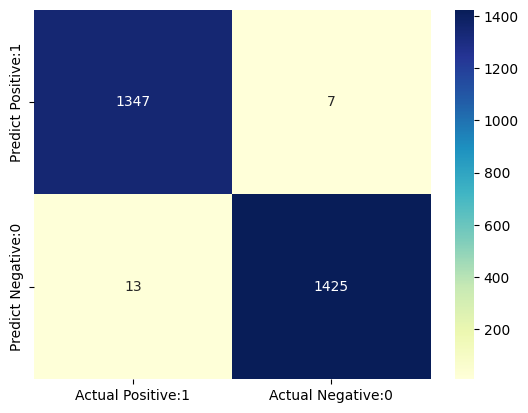

In [56]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')